<a href="https://colab.research.google.com/github/Asal-Sanei/MachineLearning2025/blob/main/Mini%20Project%204%20/MP4_Question4_LunarLander_FinalEdit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installing Packages

In [ ]:
!pip install rarfile --quiet
!apt-get update
!apt-get install -y swig
!pip install stable-baselines3 > /dev/null
!pip install box2d-py > /dev/null
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!sudo apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,747 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,253 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64

In [ ]:
!pip3 install gym --upgrade
!pip3 install pyglet
!pip3 install Box2D
!pip3 install box2d-py
!pip3 install gym[Box_2D]
!pip3 install gym[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827729 sha256=8f6691e0b80988f15434d58272d619aca5044a320031b552c6a7820504d6edb4
  Stored in directory: /root/.cache/pip/wheels/1c/77/9e/9af5470201a0b0543937933ee99ba884cd237d2faefe8f4d37
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.0/984.0 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [ ]:
!sudo apt-get update
!sudo apt-get install xvfb

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
import torch

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

#Lunar Lander import

In [ ]:
# enviroment
import gym
env = gym.make('LunarLander-v2', render_mode="rgb_array")
#TODO: find observation size: 8
state_size = env.observation_space.shape[0]
#TODO: find action size: 4: 0- Do nothing 1- Fire left engine 2- Fire down engine 3- Fire right engine
action_size = env.action_space.n
state_size, action_size

(8, 4)

#Virtual Display

In [ ]:
import io
import os
import glob
import torch
import base64
import stable_baselines3
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.results_plotter import ts2xy, load_results
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_util import make_atari_env
import gym
from gym import spaces
from gym.wrappers import RecordVideo
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
from IPython import display as ipythondisplay
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import random
from collections import namedtuple, deque
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [ ]:
display = Display(visible=0, size=(1400, 900))
display.start()

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
      mp4 = mp4list[0]
      video = io.open(mp4, 'r+b').read()
      encoded = base64.b64encode(video)
      ipythondisplay.display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;">
                  <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                </video>'''.format(encoded.decode('ascii'))))
  else:
      print("Could not find video")

#Experience Replay

In [ ]:
import random
from collections import namedtuple, deque

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward', 'done'))

class ExperienceReplay():
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def store_trans(self, s, a, sp, r, done):
        transition = Transition(s, a, sp, r, done)
        self.memory.append(transition)

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

#DQN

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class DeepQNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(DeepQNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(state_size, 512),
            nn.ReLU(),
            nn.LayerNorm(512),
            nn.Dropout(0.1),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.LayerNorm(512),
            nn.Dropout(0.1),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, action_size)
        )

    def forward(self, x):
        return self.net(x)


#DQN Agent

In [ ]:
# DQN agent
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class DQNAgent():
    def __init__(self, state_size, action_size, batch_size, gamma=0.99, buffer_size=25000, alpha=1e-4, tau=1e-3):
        self.state_size = state_size
        self.action_size = action_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau  # For soft update of target network parameters
        self.experience_replay = ExperienceReplay(buffer_size)

        # Main network
        self.value_net = DeepQNetwork(state_size, action_size).to(device)
        # Target network
        self.target_net = DeepQNetwork(state_size, action_size).to(device)
        self.target_net.load_state_dict(self.value_net.state_dict())
        self.target_net.eval()  # Target network does not train

        self.optimizer = optim.Adam(self.value_net.parameters(), lr=alpha)

    def take_action(self, state, eps=0.0):
        self.value_net.eval()
        if random.random() > eps:
            with torch.no_grad():
                return torch.argmax(self.value_net(torch.tensor(state).float().unsqueeze(0).to(device))).item()
        else:
            return np.random.randint(0, self.action_size)

    def update_params(self):
        if len(self.experience_replay) < self.batch_size:
            return
        batch = Transition(*zip(*self.experience_replay.sample(self.batch_size)))

        state_batch = torch.tensor(np.array(batch.state), dtype=torch.float32).to(device)
        action_batch = torch.tensor(batch.action, dtype=torch.int64).unsqueeze(1).to(device)
        next_state_batch = torch.tensor(np.array(batch.next_state), dtype=torch.float32).to(device)
        reward_batch = torch.tensor(batch.reward, dtype=torch.float32).unsqueeze(1).to(device)
        done_batch = torch.tensor(batch.done, dtype=torch.float32).unsqueeze(1).to(device)

        q_expected = self.value_net(state_batch).gather(1, action_batch)
        q_targets_next = self.target_net(next_state_batch).detach().max(1)[0].unsqueeze(1)
        q_targets = reward_batch + (self.gamma * q_targets_next * (1 - done_batch))
        loss = F.mse_loss(q_expected, q_targets)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Soft update target network parameters
        for target_param, local_param in zip(self.target_net.parameters(), self.value_net.parameters()):
            target_param.data.copy_(self.tau * local_param.data + (1.0 - self.tau) * target_param.data)

    def save(self, fname):
        torch.save(self.value_net.state_dict(), fname)

    def load(self, fname):
        self.value_net.load_state_dict(torch.load(fname, map_location=device))



In [ ]:
pip install --upgrade gym

In [ ]:
# Import gymnasium instead of gym
import gymnasium as gym
import numpy as np
import torch
from collections import deque, namedtuple
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
import random
import os
import matplotlib.pyplot as plt # For pl

##Episode50/Batch_size=32

In [ ]:
n_episodes_32_50 =50
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE_32_50 = 32

In [ ]:
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE_32_50)
crs = np.zeros(n_episodes_32_50)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes_32_50 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE_32_50}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE_32_50}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -144.80	Epsilon: 0.47
Episode 49	Average Reward: -87.87	Epsilon: 0.22

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch32/eps50 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch32/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -93.56	Epsilon: 0.22


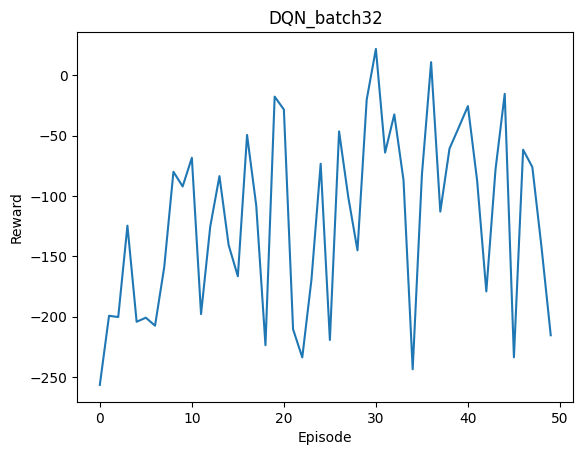

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE_32_50}")
plt.savefig(f"DQN_batch{BATCH_SIZE_32_50}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##Episode100/Batch_size=32


In [ ]:
n_episodes =100
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 32

In [ ]:

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -149.88	Epsilon: 0.47
Episode 49	Average Reward: -109.48	Epsilon: 0.22Moviepy - Building video /content/DQN/batch32/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -112.68	Epsilon: 0.22
Episode 75	Average Reward: 116.30	Epsilon: 0.10
Episode 99	Average Reward: 161.02	Epsilon: 0.05Moviepy - Building video /content/DQN/batch32/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 162.51	Epsilon: 0.05


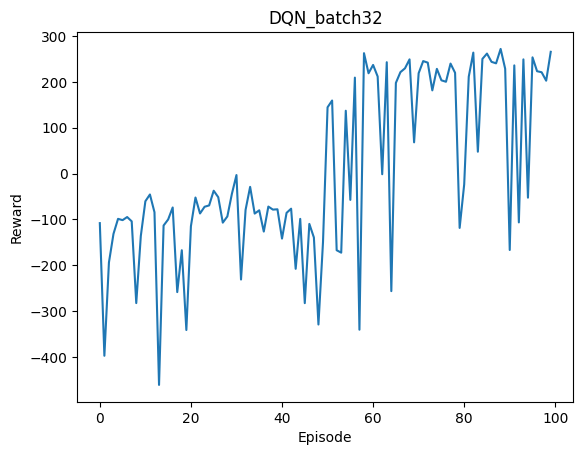

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##Episode150/Batch_size=32


In [ ]:
n_episodes_150 =150
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 32

In [ ]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes_150)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes_150 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -195.29	Epsilon: 0.47
Episode 49	Average Reward: -96.92	Epsilon: 0.22

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch32/eps50 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch32/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -102.99	Epsilon: 0.22
Episode 75	Average Reward: -123.35	Epsilon: 0.10
Episode 99	Average Reward: -18.25	Epsilon: 0.05

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch32/eps100 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch32/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: -14.16	Epsilon: 0.05
Episode 125	Average Reward: -89.49	Epsilon: 0.02
Episode 149	Average Reward: -29.53	Epsilon: 0.01

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch32/eps150 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch32/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: -15.62	Epsilon: 0.01


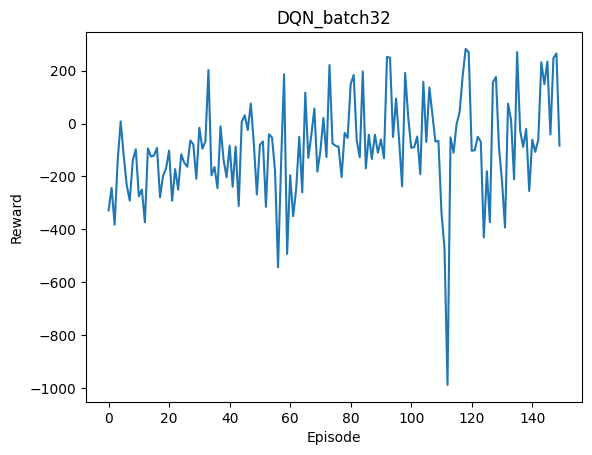

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##Episode200/Batch_size=32


In [ ]:
n_episodes_200 =200
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 32

In [ ]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes_200)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes_200 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -132.26	Epsilon: 0.47
Episode 49	Average Reward: -93.31	Epsilon: 0.22

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch32/eps50 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch32/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -93.74	Epsilon: 0.22
Episode 75	Average Reward: 50.36	Epsilon: 0.10
Episode 99	Average Reward: 109.94	Epsilon: 0.05

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch32/eps100 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch32/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 122.72	Epsilon: 0.05
Episode 125	Average Reward: 98.20	Epsilon: 0.02
Episode 149	Average Reward: 130.12	Epsilon: 0.01

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch32/eps150 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch32/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 130.56	Epsilon: 0.01
Episode 175	Average Reward: 203.75	Epsilon: 0.01
Episode 199	Average Reward: 231.07	Epsilon: 0.01Moviepy - Building video /content/DQN/batch32/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 247.04	Epsilon: 0.01


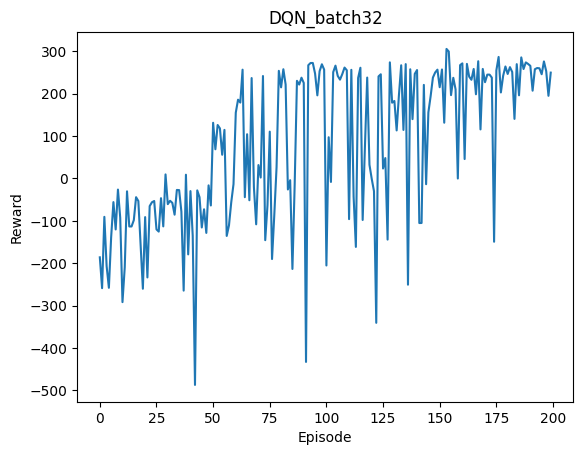

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##Episode250/Batch_size=32


In [ ]:
n_episodes_32_250 =250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE_32_250= 32

In [ ]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE_32_250)
crs = np.zeros(n_episodes_32_250)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes_32_250 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE_32_250}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE_32_250}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -130.47	Epsilon: 0.47
Episode 49	Average Reward: -46.25	Epsilon: 0.22Moviepy - Building video /content/DQN/batch32/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -60.26	Epsilon: 0.22
Episode 75	Average Reward: 33.26	Epsilon: 0.10
Episode 99	Average Reward: 77.42	Epsilon: 0.05Moviepy - Building video /content/DQN/batch32/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 66.36	Epsilon: 0.05
Episode 125	Average Reward: 191.83	Epsilon: 0.02
Episode 149	Average Reward: 93.04	Epsilon: 0.01Moviepy - Building video /content/DQN/batch32/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 92.57	Epsilon: 0.01
Episode 175	Average Reward: 181.13	Epsilon: 0.01
Episode 199	Average Reward: 198.36	Epsilon: 0.01Moviepy - Building video /content/DQN/batch32/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 194.40	Epsilon: 0.01
Episode 225	Average Reward: 190.50	Epsilon: 0.01
Episode 249	Average Reward: 186.51	Epsilon: 0.01Moviepy - Building video /content/DQN/batch32/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: 185.09	Epsilon: 0.01


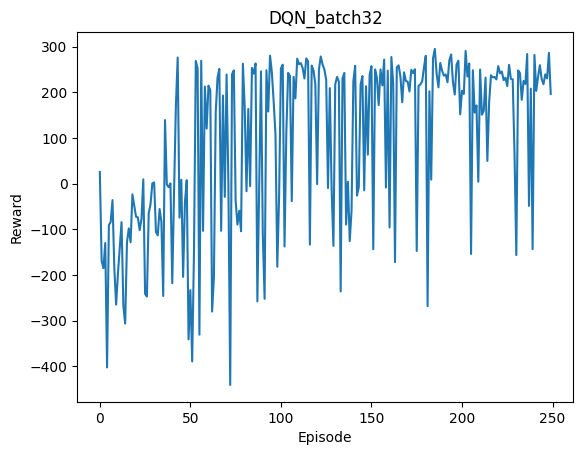

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE_32_250}")
plt.savefig(f"DQN_batch{BATCH_SIZE_32_250}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##Episode50/Batch_size=64


In [ ]:
n_episodes_64_50 =50
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE_64_50 = 64

In [ ]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE_64_50)
crs = np.zeros(n_episodes_64_50)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes_64_50 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE_64_50}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE_64_50}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -160.10	Epsilon: 0.14
Episode 49	Average Reward: -217.90	Epsilon: 0.07

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch64/eps50 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch64/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -183.35	Epsilon: 0.06


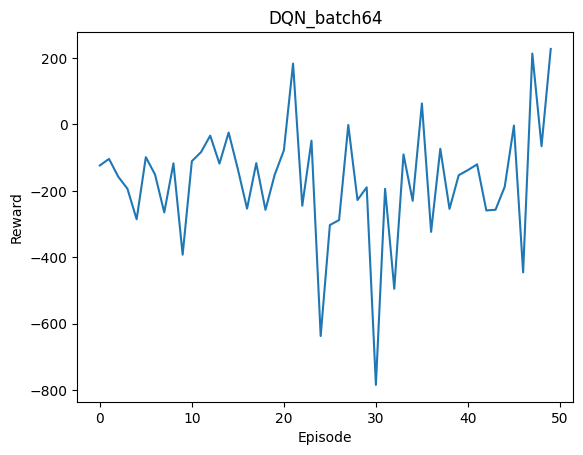

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE_64_50}")
plt.savefig(f"DQN_batch{BATCH_SIZE_64_50}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##Episode=100/Batch_size=64


In [ ]:
n_episodes_64_100 =100
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE_64_100 = 64

In [ ]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE_64_100)
crs = np.zeros(n_episodes_64_100)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes_64_100 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE_64_100}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE_64_100}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -159.82	Epsilon: 0.01
Episode 49	Average Reward: -396.28	Epsilon: 0.01

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch64/eps50 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch64/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -402.06	Epsilon: 0.01
Episode 75	Average Reward: -162.49	Epsilon: 0.01
Episode 99	Average Reward: -194.17	Epsilon: 0.01

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch64/eps100 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch64/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: -187.04	Epsilon: 0.01


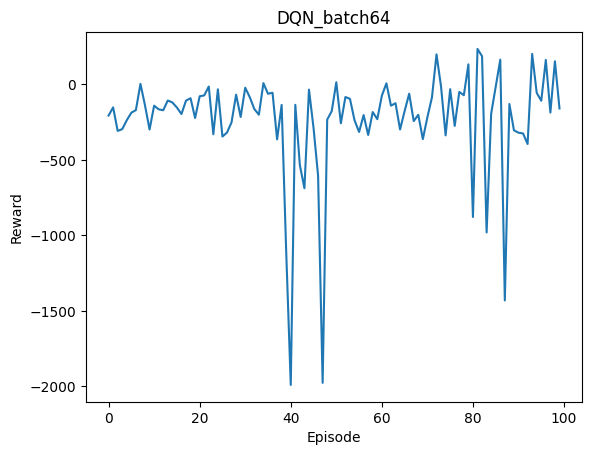

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE_64_100}")
plt.savefig(f"DQN_batch{BATCH_SIZE_64_100}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##Episode=150/Batch_size=64


In [ ]:
n_episodes_150_64 =150
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE_150_64 = 64

In [ ]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE_150_64)
crs = np.zeros(n_episodes_150_64)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes_150_64 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE_150_64}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE_150_64}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -142.37	Epsilon: 0.47
Episode 49	Average Reward: -100.43	Epsilon: 0.22

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch64/eps50 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch64/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -102.66	Epsilon: 0.22
Episode 75	Average Reward: -93.00	Epsilon: 0.10
Episode 99	Average Reward: -59.02	Epsilon: 0.05

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch64/eps100 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch64/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: -44.50	Epsilon: 0.05
Episode 125	Average Reward: -60.08	Epsilon: 0.02
Episode 149	Average Reward: -46.98	Epsilon: 0.01

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch64/eps150 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch64/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: -40.32	Epsilon: 0.01


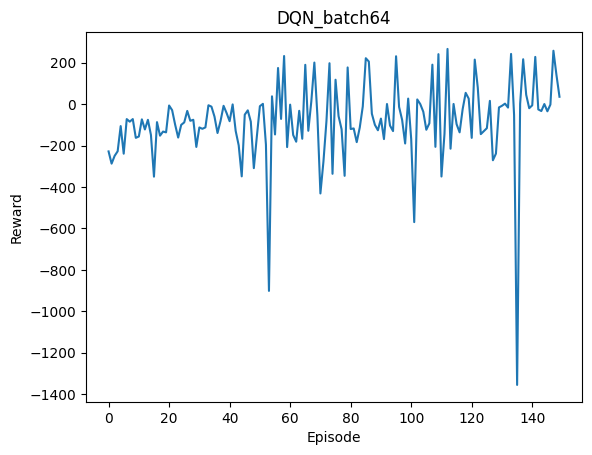

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE_150_64}")
plt.savefig(f"DQN_batch{BATCH_SIZE_150_64}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##Episode=200/Batch_size=64


In [ ]:
n_episodes_64_200 =200
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 64

In [ ]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes_64_200)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes_64_200 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -205.79	Epsilon: 0.12
Episode 49	Average Reward: -210.43	Epsilon: 0.06Moviepy - Building video /content/DQN/batch64/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -216.42	Epsilon: 0.06
Episode 75	Average Reward: -82.97	Epsilon: 0.03
Episode 99	Average Reward: -71.42	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: -67.74	Epsilon: 0.01
Episode 125	Average Reward: 9.64	Epsilon: 0.01
Episode 149	Average Reward: 80.96	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 80.50	Epsilon: 0.01
Episode 175	Average Reward: 118.24	Epsilon: 0.01
Episode 199	Average Reward: 60.01	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 76.18	Epsilon: 0.01


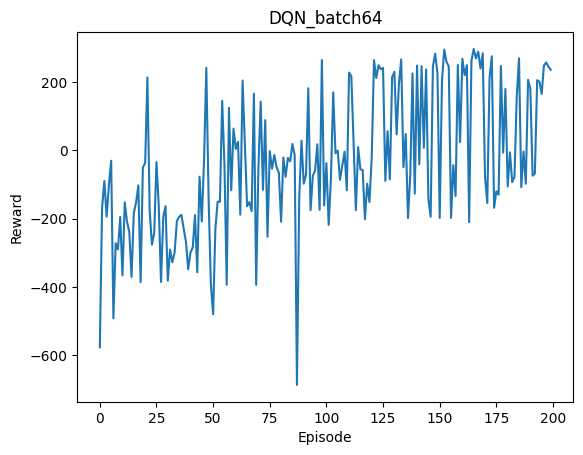

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##Episode=250/Batch_size=64


In [ ]:
n_ep_64_250 =250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE_64_250 = 64

In [ ]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE_64_250)
crs = np.zeros(n_ep_64_250)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_ep_64_250 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE_64_250}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE_64_250}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -195.46	Epsilon: 0.02
Episode 49	Average Reward: -306.11	Epsilon: 0.01

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch64/eps50 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch64/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -302.92	Epsilon: 0.01
Episode 75	Average Reward: -243.54	Epsilon: 0.01
Episode 99	Average Reward: -121.90	Epsilon: 0.01

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch64/eps100 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch64/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: -125.58	Epsilon: 0.01
Episode 125	Average Reward: -54.53	Epsilon: 0.01
Episode 149	Average Reward: 21.82	Epsilon: 0.01

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch64/eps150 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch64/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 32.90	Epsilon: 0.01
Episode 175	Average Reward: 64.22	Epsilon: 0.01
Episode 199	Average Reward: 59.19	Epsilon: 0.01

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch64/eps200 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch64/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 58.27	Epsilon: 0.01
Episode 225	Average Reward: 66.57	Epsilon: 0.01
Episode 249	Average Reward: 14.65	Epsilon: 0.01

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch64/eps250 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch64/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: 8.78	Epsilon: 0.01


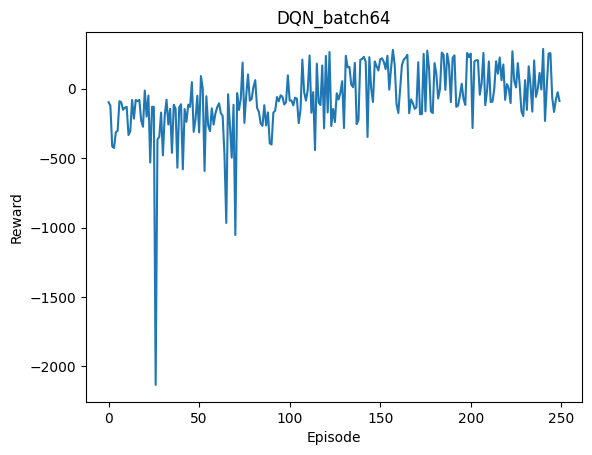

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE_64_250}")
plt.savefig(f"DQN_batch{BATCH_SIZE_64_250}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##Episode=50/Batch_size=128

In [ ]:
n_episodes_128_50=50
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE_128_50 = 128

In [ ]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE_128_50)
crs = np.zeros(n_episodes_128_50)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes_128_50 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE_128_50}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE_128_50}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -135.90	Epsilon: 0.47
Episode 49	Average Reward: -123.63	Epsilon: 0.22

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch128/eps50 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch128/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -136.83	Epsilon: 0.22


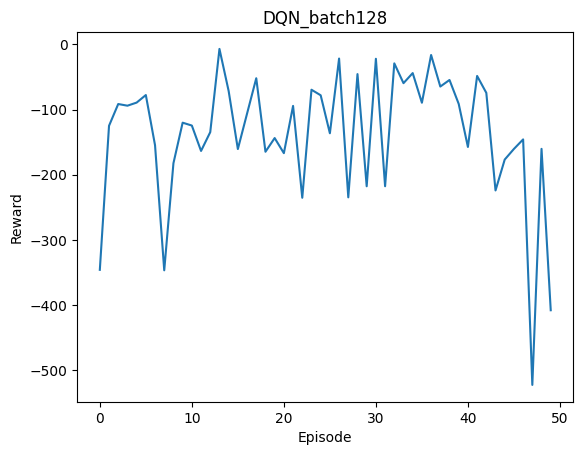

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE_128_50}")
plt.savefig(f"DQN_batch{BATCH_SIZE_128_50}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##Episode=100/Batch_size=128

In [ ]:
n_episodes_128_100 =100
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE_128_100 = 128

In [ ]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE_128_100)
crs = np.zeros(n_episodes_128_100)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes_128_100 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE_128_100}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE_128_100}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -150.92	Epsilon: 0.47
Episode 49	Average Reward: -150.68	Epsilon: 0.22

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch128/eps50 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch128/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -140.56	Epsilon: 0.22
Episode 75	Average Reward: -98.02	Epsilon: 0.10
Episode 99	Average Reward: -63.07	Epsilon: 0.05

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch128/eps100 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch128/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: -62.17	Epsilon: 0.05


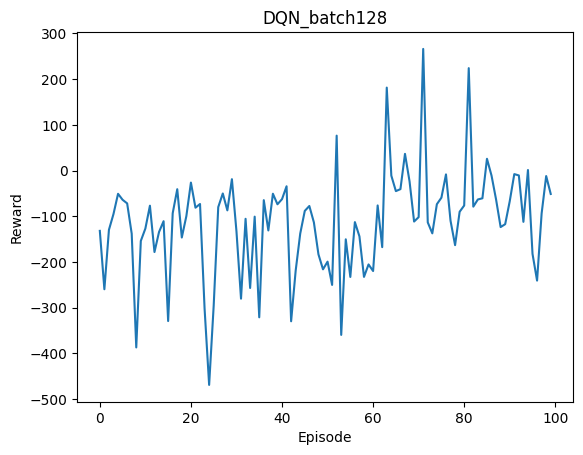

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE_128_100}")
plt.savefig(f"DQN_batch{BATCH_SIZE_128_100}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##Episode=150/Batch_size=128

In [ ]:
n_episodes_150_128 =150
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE_150_128 = 128

In [ ]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE_150_128)
crs = np.zeros(n_episodes_150_128)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes_150_128 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE_150_128}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE_150_128}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -120.86	Epsilon: 0.47
Episode 49	Average Reward: -52.26	Epsilon: 0.22Moviepy - Building video /content/DQN/batch128/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -56.74	Epsilon: 0.22
Episode 75	Average Reward: 104.84	Epsilon: 0.10
Episode 99	Average Reward: 53.88	Epsilon: 0.05Moviepy - Building video /content/DQN/batch128/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 44.23	Epsilon: 0.05
Episode 125	Average Reward: 88.33	Epsilon: 0.02
Episode 149	Average Reward: 176.40	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 176.83	Epsilon: 0.01


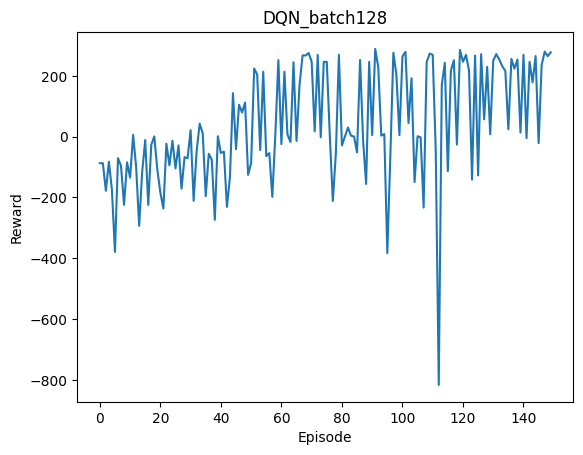

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE_150_128}")
plt.savefig(f"DQN_batch{BATCH_SIZE_150_128}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##Episode=200/Batch_size=128

In [ ]:
n_episodes_128_200 =200
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE_128_200 = 128

In [ ]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE_128_200)
crs = np.zeros(n_episodes_128_200)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes_128_200 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE_128_200}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE_128_200}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -154.06	Epsilon: 0.29
Episode 49	Average Reward: -128.21	Epsilon: 0.14

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch128/eps50 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch128/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -139.07	Epsilon: 0.13
Episode 75	Average Reward: -126.24	Epsilon: 0.06
Episode 99	Average Reward: 6.37	Epsilon: 0.03

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch128/eps100 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch128/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 9.68	Epsilon: 0.03
Episode 125	Average Reward: 100.23	Epsilon: 0.01
Episode 149	Average Reward: 199.10	Epsilon: 0.01

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch128/eps150 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch128/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 198.64	Epsilon: 0.01
Episode 175	Average Reward: 150.59	Epsilon: 0.01
Episode 199	Average Reward: 157.49	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 154.78	Epsilon: 0.01


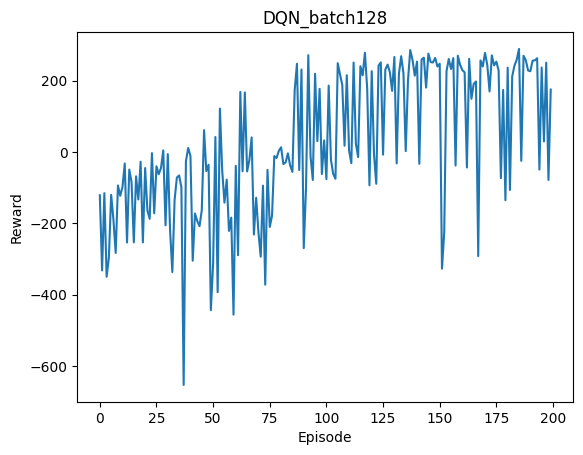

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE_128_200}")
plt.savefig(f"DQN_batch{BATCH_SIZE_128_200}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##Episode=250/Batch_size=128

In [ ]:
n_episodes_128_250 =250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE_128_250 = 128

In [ ]:
# training phase

# Mine
agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE_128_250)
crs = np.zeros(n_episodes_128_250)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes_128_250 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE_128_250}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE_128_250}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -213.61	Epsilon: 0.14
Episode 49	Average Reward: -186.76	Epsilon: 0.07Moviepy - Building video /content/DQN/batch128/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -195.31	Epsilon: 0.06
Episode 75	Average Reward: -127.32	Epsilon: 0.03
Episode 99	Average Reward: 16.06	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 19.09	Epsilon: 0.01
Episode 125	Average Reward: -107.82	Epsilon: 0.01
Episode 149	Average Reward: 7.24	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 17.82	Epsilon: 0.01
Episode 175	Average Reward: 23.56	Epsilon: 0.01
Episode 199	Average Reward: 75.65	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 86.83	Epsilon: 0.01
Episode 225	Average Reward: 130.08	Epsilon: 0.01
Episode 249	Average Reward: 138.21	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: 135.91	Epsilon: 0.01


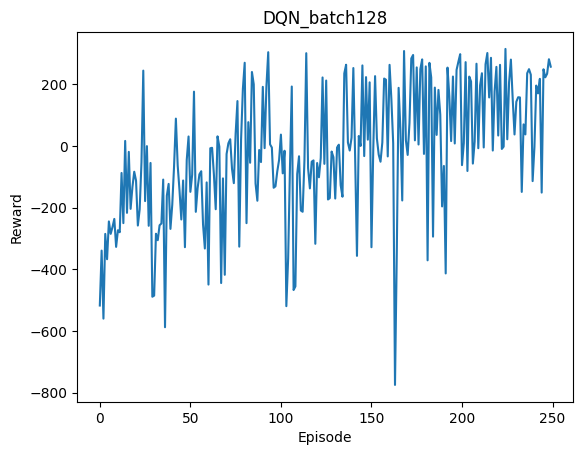

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE_128_250}")
plt.savefig(f"DQN_batch{BATCH_SIZE_128_250}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

#DDQN

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import copy

# Mine
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import copy

class DDQNAgent():
    def __init__(self, state_size, action_size, batch_size, gamma=0.99, buffer_size=25000, alpha=1e-4, tau=1e-3):
        self.state_size = state_size
        self.action_size = action_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau  # For soft update of target network parameters
        self.experience_replay = ExperienceReplay(buffer_size)

        # Main network
        self.value_net = DeepQNetwork(state_size, action_size).to(device)
        # Target network
        self.target_net = DeepQNetwork(state_size, action_size).to(device)
        self.target_net.load_state_dict(self.value_net.state_dict())
        self.target_net.eval()  # Target network does not train

        self.optimizer = optim.Adam(self.value_net.parameters(), lr=alpha)

    def take_action(self, state, eps=0.0):
        self.value_net.eval()
        if random.random() > eps:
            with torch.no_grad():
                return torch.argmax(self.value_net(torch.tensor(state).float().unsqueeze(0).to(device))).item()
        else:
            return np.random.randint(0, self.action_size)

    def update_params(self):
        if len(self.experience_replay) < self.batch_size:
            return
        batch = Transition(*zip(*self.experience_replay.sample(self.batch_size)))

        state_batch = torch.tensor(np.array(batch.state), dtype=torch.float32).to(device)
        action_batch = torch.tensor(batch.action, dtype=torch.int64).unsqueeze(1).to(device)
        next_state_batch = torch.tensor(np.array(batch.next_state), dtype=torch.float32).to(device)
        reward_batch = torch.tensor(batch.reward, dtype=torch.float32).unsqueeze(1).to(device)
        done_batch = torch.tensor(batch.done, dtype=torch.float32).unsqueeze(1).to(device)

        q_expected = self.value_net(state_batch).gather(1, action_batch)

        # Double DQN: Use value_net to select action, target_net to estimate Q-value
        next_action_batch = torch.argmax(self.value_net(next_state_batch), dim=1, keepdim=True)
        q_targets_next = self.target_net(next_state_batch).gather(1, next_action_batch).detach()
        q_targets = reward_batch + (self.gamma * q_targets_next * (1 - done_batch))

        loss = F.mse_loss(q_expected, q_targets)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Soft update target network parameters
        self.soft_update(self.value_net, self.target_net, self.tau)

    def soft_update(self, local_model, target_model, tau):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau * local_param.data + (1.0 - tau) * target_param.data)

    def save(self, fname):
        torch.save(self.value_net.state_dict(), fname)

    def load(self, fname):
        self.value_net.load_state_dict(torch.load(fname, map_location=device))

##Episode=100/Batch_size=128ction

In [ ]:
# NOTE: DON'T change values
n_episodes_100_128 = 100
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE_100_128 = 128

In [ ]:
# training phase

# Initialize agent
agent = DDQNAgent(state_size, action_size, batch_size=BATCH_SIZE_100_128)

crs = np.zeros(n_episodes_100_128)  # cumulative rewards
crs_recent = deque(maxlen=25)  # recent cumulative rewards

for i_episode in range(1, n_episodes_100_128 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DDQN/batch{BATCH_SIZE_100_128}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE_100_128}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

Episode 25	Average Reward: -169.06	Epsilon: 0.47
Episode 43	Average Reward: -135.59	Epsilon: 0.27

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DDQN_batch{BATCH_SIZE}")
plt.savefig(f"DDQN_batch{BATCH_SIZE}.pdf")
plt.show()
! zip -r DDQN3.zip DDQN/

In [ ]:
import io
import base64
import os
from IPython.display import HTML, display

def show_video_from_path(video_path):
  """Displays a video from a local path in the Colab notebook."""
  if os.path.exists(video_path):
    video = io.open(video_path, 'r+b').read()
    encoded = base64.b64encode(video)
    display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
              </video>'''.format(encoded.decode('ascii'))))
  else:
    print(f"Could not find video at {video_path}")

show_video_from_path("DDQN/batch128/eps100/rl-video-episode-0.mp4")

##Episode=250/Batch_size=128ction

In [ ]:
# NOTE: DON'T change values
n_episodes_250_128 = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE_25_128= 128

In [ ]:
# training phase

# Initialize agent
agent = DDQNAgent(state_size, action_size, batch_size=BATCH_SIZE_25_128)

crs = np.zeros(n_episodes_250_128)  # cumulative rewards
crs_recent = deque(maxlen=25)  # recent cumulative rewards

for i_episode in range(1, n_episodes_250_128 + 1):
    env = RecordVideo(gym.make("LunarLander-v3", render_mode="rgb_array"), f"./DDQN/batch{BATCH_SIZE_25_128}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v3", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE_25_128}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DDQN_batch{BATCH_SIZE}")
plt.savefig(f"DDQN_batch{BATCH_SIZE}.pdf")
plt.show()
! zip -r DDQN3.zip DDQN/

#Videos

In [ ]:
# prompt: Display the video DDQN/batch128/eps100/rl-video-episode-0.mp4
import io
import base64
import os
from IPython.display import HTML, display

def show_video_from_path(video_path):
  """Displays a video from a local path in the Colab notebook."""
  if os.path.exists(video_path):
    video = io.open(video_path, 'r+b').read()
    encoded = base64.b64encode(video)
    display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
              </video>'''.format(encoded.decode('ascii'))))
  else:
    print(f"Could not find video at {video_path}")

show_video_from_path("/content/DQN/batch32/eps100/rl-video-episode-0.mp4")

Could not find video at /content/DQN/batch32/eps100/rl-video-episode-0.mp4
